<a href="https://colab.research.google.com/github/shadowboxingskills/notebooks/blob/master/Boston_housing_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple regression example using Boston housing dataset

## Import standard libraries

In [0]:
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

## Import Boston housing dataset

In [140]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
# print(boston.keys())
# print(boston.feature_names)

(506, 13)


## Dataset description

In [30]:
# review the dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Convert dataset to pandas data frame

In [53]:
# load the features into a data frame
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# append price target as the last column 
df['MEDV'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,18.0,2.3,0.0,0.5,6.6,65.2,4.1,1.0,296.0,15.3,396.9,5.0,24.0
1,0.0,0.0,7.1,0.0,0.5,6.4,78.9,5.0,2.0,242.0,17.8,396.9,9.1,21.6
2,0.0,0.0,7.1,0.0,0.5,7.2,61.1,5.0,2.0,242.0,17.8,392.8,4.0,34.7
3,0.0,0.0,2.2,0.0,0.5,7.0,45.8,6.1,3.0,222.0,18.7,394.6,2.9,33.4
4,0.1,0.0,2.2,0.0,0.5,7.1,54.2,6.1,3.0,222.0,18.7,396.9,5.3,36.2


In [54]:
pd.options.display.float_format = '{:.1f}'.format
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


## Data preprocessing

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

## Split the data into training/testing sets

In [0]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [117]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(337, 13)
(169, 13)
(337,)
(169,)


## Train the model using the training set

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training set
regressor.fit(X_train, y_train)

# Returns the coefficient of determination R^2 of the prediction
print("Regressor score:", regressor.score(X_train, y_train))

# The coefficients
print("Regressor coefficients:", regressor.coef_)

# The intercept
print("Regressor intercept:", regressor.intercept_)

Regressor score: 0.7389831456966496
Regressor coefficients: [-1.29469552e-01  3.79597901e-02  6.09783935e-02  3.21349778e+00
 -1.64996136e+01  3.91151860e+00 -1.26019052e-02 -1.42774164e+00
  2.39545629e-01 -8.17982439e-03 -9.35991036e-01  1.19478911e-02
 -5.46562433e-01]
Regressor intercept: 33.440834273883674


## Make predictions using the testing set

In [137]:
# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 20.60
Variance score: 0.73


## Plot the actual vs. predicted price values

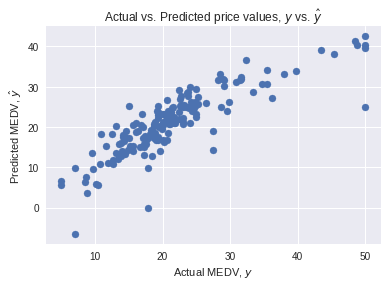

In [138]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MEDV, $y$")
plt.ylabel("Predicted MEDV, $\hat{y}$")
plt.title("Actual vs. Predicted price values, $y$ vs. $\hat{y}$")
plt.show()

## Make ad-hoc predictions

In [133]:
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,18.0,2.3,0.0,0.5,6.6,65.2,4.1,1.0,296.0,15.3,396.9,5.0
1,0.0,0.0,7.1,0.0,0.5,6.4,78.9,5.0,2.0,242.0,17.8,396.9,9.1
2,0.0,0.0,7.1,0.0,0.5,7.2,61.1,5.0,2.0,242.0,17.8,392.8,4.0
3,0.0,0.0,2.2,0.0,0.5,7.0,45.8,6.1,3.0,222.0,18.7,394.6,2.9
4,0.1,0.0,2.2,0.0,0.5,7.1,54.2,6.1,3.0,222.0,18.7,396.9,5.3


In [134]:
X_input = X[:5]

# Make predictions using the testing set
y_pred = regressor.predict(X_input)

print(y_pred)

[29.96237934 24.74540272 30.70242555 28.66092399 27.85397281]
